<a href="https://colab.research.google.com/github/mohamadhabash/Image-Classification-Projects/blob/main/MNIST_LeNet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
import random

np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


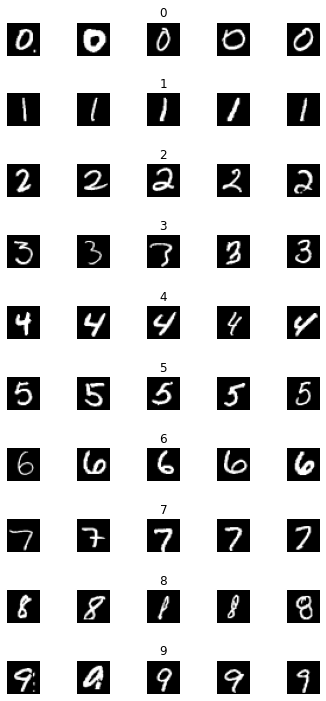

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949] 



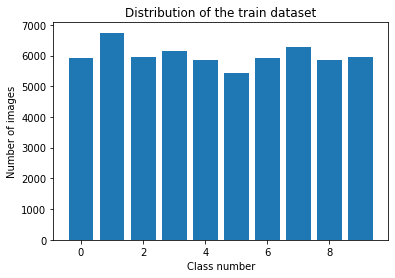

In [ ]:
print(num_of_samples, '\n')

plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Transfer labels to one-hot encoded format
y_train = to_categorical(y_train, 10) # 10 is the number of classes 
y_test = to_categorical(y_test, 10)

# Normalize
X_train = X_train/255
X_test = X_test/255

In [ ]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(15, (5, 5), input_shape=(28, 28, 1), activation='relu'))   # number of filters, size of filters, shape of input data , activation fun
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 15)        390       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 15)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 30)        4080      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 30)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 750)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               375500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)              

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=256, verbose=1, shuffle=1)

Epoch 1/5
211/211 [==============================] - 3s 11ms/step - loss: 0.3424 - accuracy: 0.8984 - val_loss: 0.0787 - val_accuracy: 0.9777
Epoch 2/5
211/211 [==============================] - 2s 9ms/step - loss: 0.0804 - accuracy: 0.9751 - val_loss: 0.0510 - val_accuracy: 0.9867
Epoch 3/5
211/211 [==============================] - 2s 9ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 4/5
211/211 [==============================] - 2s 9ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0404 - val_accuracy: 0.9888
Epoch 5/5
211/211 [==============================] - 2s 9ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0388 - val_accuracy: 0.9897


Text(0.5, 0, 'epoch')

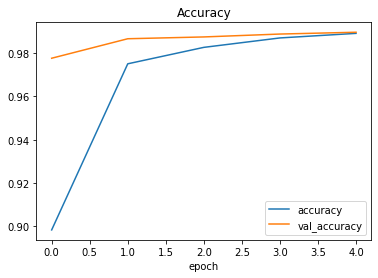

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

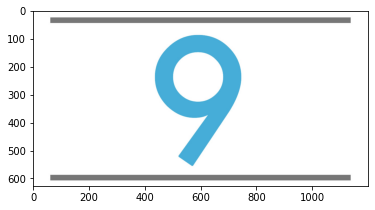

In [ ]:
import requests
from PIL import Image
 
url = 'https://www.angelsnumbers.com/wp-content/uploads/2019/03/9.jpg'
response = requests.get(url, stream=True)

img = Image.open(response.raw)
plt.imshow(img)

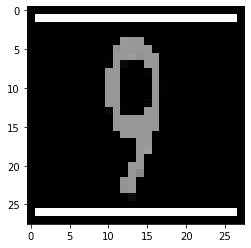

In [ ]:
import cv2

# Preprocess
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
img = img/255
img = img.reshape(1, 28, 28, 1)
 
predict_x=model.predict(img) 

print(f'predicted label: {np.argmax(predict_x, axis=1)[0]}')
print()
print(predict_x)

predicted label: 9

[[0.00417341 0.02445879 0.01948907 0.03634068 0.27137023 0.0462564
  0.0035462  0.06641787 0.01988658 0.50806075]]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.02954937145113945
Test Accuracy: 0.9901999831199646


In [ ]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 15)
(1, 10, 10, 30)


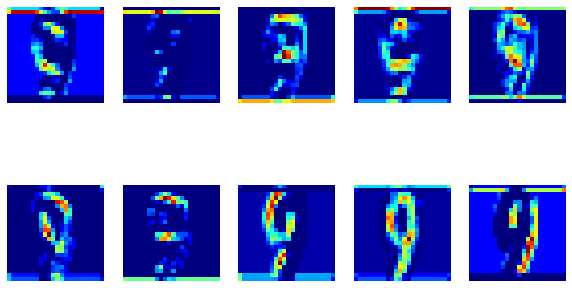

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

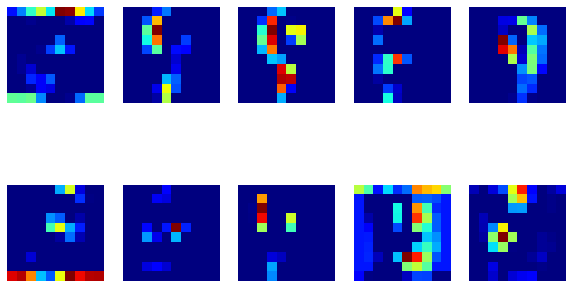

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')